In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
heart_db = pd.read_csv('SAheart.data')
heart_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


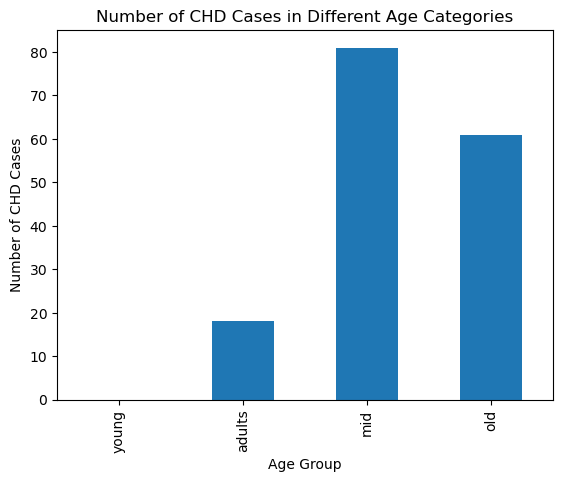

In [5]:
# Define a function to categorize age ranges
def categorize_age(age):
    if age <= 15:
        return "young"
    elif age <= 35:
        return "adults"
    elif age <= 55:
        return "mid"
    else:
        return "old"

# Apply the function to create the new "agegroup" column
heart_db["agegroup"] = heart_db["age"].apply(categorize_age)

# Count CHD cases in different age categories
chd_age_counts = heart_db[heart_db["chd"] == 1]["agegroup"].value_counts()

# Sort age groups based on their natural order
age_order = ["young", "adults", "mid", "old"]
chd_age_counts_sorted = chd_age_counts.reindex(age_order)

# Plotting
chd_age_counts_sorted.plot(kind="bar")
plt.title("Number of CHD Cases in Different Age Categories")
plt.xlabel("Age Group")
plt.ylabel("Number of CHD Cases")
plt.show()